# Reto Clasificación flores
### Cargamos las librerías y las funciones a utilizar

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

# Cargamos la base de datos Iris
iris = load_iris()

# Funciones de la practica

# Función para calcular especificidad
def calcular_especificidad(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    especificidades = []
    
    for i in range(len(iris.target_names)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        if (tn + fp) != 0:
            especificidad = tn / (tn + fp)
        else:
            especificidad = np.nan
        especificidades.append(especificidad)
    
    return np.nanmean(especificidades)

# Función para evaluar el modelo
def evaluar_modelo(nombre, y_test, y_pred, modelo, X_test):
    print(f'\nResultados para {nombre}:')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    especificidad = calcular_especificidad(y_test, y_pred)

    print(f'Precision: {precision}')
    print(f'Recall (Sensibilidad): {recall}')
    print(f'F1-score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Especificidad: {especificidad}')

    # Curva ROC y AUC
    y_prob = modelo.predict_proba(X_test)
    fpr = {}
    tpr = {}
    auc = {}

    for i in range(len(iris.target_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        auc[i] = roc_auc_score(y_test == i, y_prob[:, i])
    
        plt.plot(fpr[i], tpr[i], label=f'Clase {iris.target_names[i]} (AUC = {auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {nombre}')
    plt.legend(loc="lower right")
    plt.show()

# Graficar las matrices de confusión
def graficar_matriz_confusion(y_test, y_pred, modelo_nombre):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Matriz de Confusión - {modelo_nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

### Cargarmos la base de datos Iris y la Graficamos

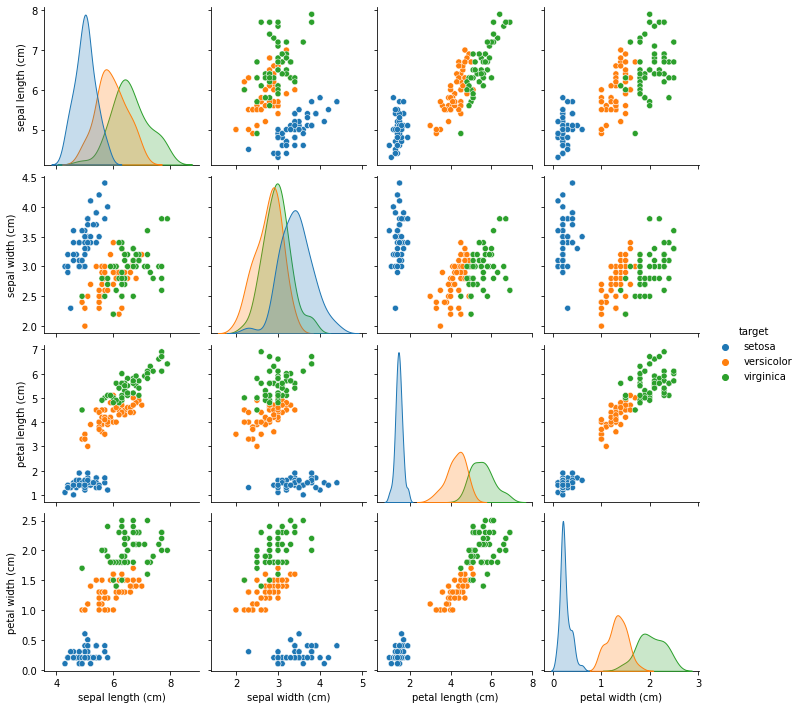

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()
sns.pairplot(df, hue='target')
plt.show()

### Separar datos en train y test

In [3]:
# Separar datos en train y test
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)
#X_train contiene el largo y el ancho del petalo y del sepalo global
#y_train contiene el tipo de flor para los X_train en orden
#X_test contiene el largo y el ancho del petalo y del sepalo para probar selescionados aleatoriamente
#y_test contiene el tipo de flor para los X_test correspondientes
print(f'Mostramos los datos de Entrenamiento: X_train shape: {X_train.shape}, Y_train shape: {y_train.shape}')
print(f'Mostramos los datos de Testeo: X_test shape: {X_test.shape}, Y_test shape: {y_test.shape}')

print("\n\nValores de Entrenamiento y Target:")
for x1, y1 in zip(X_train, y_train):
    print(f'{x1} -> {iris.target_names[y1]}')

Mostramos los datos de Entrenamiento: X_train shape: (105, 4), Y_train shape: (105,)
Mostramos los datos de Testeo: X_test shape: (45, 4), Y_test shape: (45,)


Valores de Entrenamiento y Target:
[4.9 2.5 4.5 1.7] -> virginica
[5.8 2.7 5.1 1.9] -> virginica
[6.8 3.  5.5 2.1] -> virginica
[6.8 2.8 4.8 1.4] -> versicolor
[4.6 3.1 1.5 0.2] -> setosa
[5.5 4.2 1.4 0.2] -> setosa
[4.4 2.9 1.4 0.2] -> setosa
[5.1 2.5 3.  1.1] -> versicolor
[7.7 2.8 6.7 2. ] -> virginica
[6.  3.  4.8 1.8] -> virginica
[6.  2.7 5.1 1.6] -> versicolor
[7.9 3.8 6.4 2. ] -> virginica
[6.5 3.  5.2 2. ] -> virginica
[5.  2.3 3.3 1. ] -> versicolor
[6.  2.9 4.5 1.5] -> versicolor
[5.7 2.9 4.2 1.3] -> versicolor
[4.6 3.6 1.  0.2] -> setosa
[6.3 2.9 5.6 1.8] -> virginica
[5.7 2.8 4.1 1.3] -> versicolor
[6.7 3.3 5.7 2.1] -> virginica
[6.7 3.1 5.6 2.4] -> virginica
[5.5 2.4 3.8 1.1] -> versicolor
[6.7 3.1 4.7 1.5] -> versicolor
[4.9 3.1 1.5 0.1] -> setosa
[6.3 3.4 5.6 2.4] -> virginica
[5.1 3.8 1.5 0.3] -> setosa
[6.1 2.

# 1. Naive Bayes


Resultados para Naive Bayes:
Precision: 0.9606481481481483
Recall (Sensibilidad): 0.9606481481481483
F1-score: 0.9606481481481483
Accuracy: 0.9555555555555556
Especificidad: 0.9761600681140911


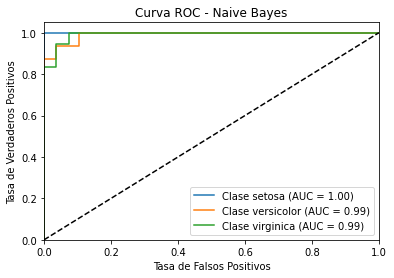

In [4]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluar_modelo("Naive Bayes", y_test, y_pred_nb, nb, X_test)

# 2. Máquinas de Soporte Vectorial


Resultados para Máquinas de Soporte Vectorial:
Precision: 0.9824561403508771
Recall (Sensibilidad): 0.9791666666666666
F1-score: 0.980238302818948
Accuracy: 0.9777777777777777
Especificidad: 0.9876543209876543


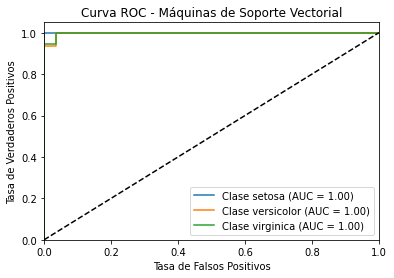

In [5]:
svm = SVC(probability=True, kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
evaluar_modelo("Máquinas de Soporte Vectorial", y_test, y_pred_svm, svm, X_test)

# Gráfica las matrices de confusión de cada modelo

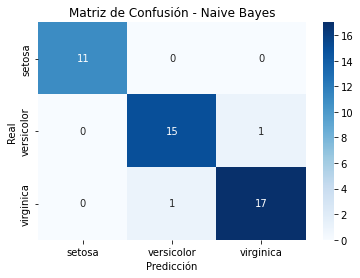

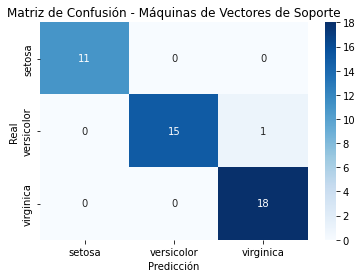

In [6]:
graficar_matriz_confusion(y_test, y_pred_nb, "Naive Bayes")
graficar_matriz_confusion(y_test, y_pred_svm, "Máquinas de Vectores de Soporte")

## Separación de Datos: Función `train_test_split()`

Para esta práctica se utiliza la función `train_test_split` de la librería `sklearn.model_selection`. Esta función se encarga de dividir el conjunto de datos en dos partes: entrenamiento (**train**) y prueba (**test**). Aunque en este caso se ha utilizado para una partición de 70% entrenamiento y 30% prueba, puede ser adaptada para incluir también un conjunto de validación. 

#### Ventajas de `train_test_split`:

1. **Facilita la evaluación del modelo**: Al separar los datos en diferentes conjuntos, podemos entrenar el modelo en el conjunto de entrenamiento y evaluarlo en el conjunto de prueba para medir su rendimiento.
2. **Generalización**: Ayuda a evaluar la capacidad de generalización del modelo en datos no vistos (el conjunto de prueba).
3. **Flexible**: Podemos ajustar el porcentaje de datos que queremos utilizar para entrenamiento, prueba e incluso validación.

### Uso en esta práctica

En este caso, hemos dividido los datos del conjunto **Iris** en 70% para entrenamiento y 30% para prueba:

```python
from sklearn.model_selection import train_test_split

# División de los datos en entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)


# Explicación de métricas de evaluación de modelos

Este documento explica las métricas de evaluación utilizadas en 2 modelos de clasificación aplicados al conjunto de datos **Iris**. Los modelos incluyen un **Gaussian Naive Bayes** y un **C-Support Vector Classification**. A continuación, se describen las métricas: precisión, recall (sensibilidad), F1-score, exactitud (accuracy), especificidad, y AUC-ROC, con su respectiva explicación matemática y cómo se implementan en el código.

---

## 1. Precisión (Precision)

La **precisión** mide la proporción de verdaderos positivos (TP) sobre el total de instancias clasificadas como positivas (TP + FP). Es útil cuando el costo de los falsos positivos es alto.

**Fórmula:**

$$
Precision = \frac{TP}{TP + FP}
$$

**En el código:** Se utiliza la función `precision_score()` de `sklearn.metrics`.

---

## 2. Recall (Sensibilidad)

El **recall** o **sensibilidad** mide la proporción de verdaderos positivos (TP) sobre el total de instancias que son realmente positivas (TP + FN). Es útil cuando el costo de los falsos negativos es alto.

**Fórmula:**

$$
Recall = \frac{TP}{TP + FN}
$$

**En el código:** Se utiliza la función `recall_score()` de `sklearn.metrics`.

---

## 3. F1-Score

El **F1-score** es la media armónica entre precisión y recall. Se utiliza cuando se quiere un balance entre estas dos métricas, especialmente en casos de datos desbalanceados.

**Fórmula:**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

**En el código:** Se calcula con la función `f1_score()` de `sklearn.metrics`.

---

## 4. Exactitud (Accuracy)

La **exactitud** mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones.

**Fórmula:**

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**En el código:** Se implementa utilizando la función `accuracy_score()` de `sklearn.metrics`.

---

## 5. Especificidad

La **especificidad** mide la proporción de verdaderos negativos (TN) sobre el total de instancias que son realmente negativas (TN + FP). Es útil para evaluar cómo el modelo evita clasificar incorrectamente instancias negativas como positivas.

**Fórmula:**

$$
Specificity = \frac{TN}{TN + FP}
$$

**En el código:** Se implementa manualmente con la función `calcular_especificidad()`, que utiliza la matriz de confusión (`confusion_matrix()`).

---

## 6. Curva ROC y AUC

La **curva ROC** muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación.

El **AUC** (Área Bajo la Curva) mide el área bajo la curva ROC. Un AUC cercano a 1 indica un buen desempeño del modelo para distinguir entre clases.

**En el código:** Se utiliza `roc_curve()` y `roc_auc_score()` para calcular y graficar la curva ROC para cada clase.

---

## 7. Matriz de Confusión

La **matriz de confusión** muestra el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) para cada clase, permitiendo visualizar los errores de clasificación.

**En el código:** La matriz de confusión se grafica utilizando `confusion_matrix()` y la función `graficar_matriz_confusion()`, que genera un heatmap de la matriz.

---

## Resumen de las Funciones Utilizadas:

- **`precision_score()`**: Calcula la precisión (macro promedio).
- **`recall_score()`**: Calcula el recall o sensibilidad (macro promedio).
- **`f1_score()`**: Calcula el F1-score (macro promedio).
- **`accuracy_score()`**: Calcula la exactitud de las predicciones.
- **`calcular_especificidad()`**: Calcula la especificidad para cada clase y retorna el promedio.
- **`roc_curve()`** y **`roc_auc_score()`**: Calculan la curva ROC y el área bajo la curva.
- **`confusion_matrix()`**: Genera la matriz de confusión.
- **`graficar_matriz_confusion()`**: Grafica la matriz de confusión usando Seaborn.

## Modelos Evaluados:

Los modelos evaluados incluyen:

1. **Gaussian Naive Bayes** (`GaussianNB`).
2. **C-Support Vector Classification** (`SVC`).

Cada modelo es entrenado con el conjunto de datos Iris y evaluado usando las métricas mencionadas. Las matrices de confusión y las curvas ROC de cada modelo se grafican para una mejor visualización del rendimiento.

---


### 1. Naive Bayes

**Naive Bayes** es un clasificador probabilístico basado en el teorema de Bayes, que asume que las características son independientes entre sí. Aunque esta suposición puede no ser realista en algunos escenarios, Naive Bayes tiende a funcionar bien en muchos casos prácticos.

- **Entrenamiento**: Se utilizó la función `GaussianNB()` para entrenar el modelo, el cual es adecuado para datos continuos.
- **Predicción**: Las predicciones en el conjunto de prueba se generaron con `nb.predict()`.
- **Evaluación**: Se calcularon todas las métricas (precisión, recall, F1-score, exactitud, especificidad, AUC) utilizando la función `evaluar_modelo()`.

```python
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluar_modelo("Naive Bayes", y_test, y_pred_nb, nb, X_test)


### 2. Máquinas de Vectores de Soporte (SVM)

Una **Máquina de Vectores de Soporte (SVM)** es un clasificador que encuentra un hiperplano que maximiza la distancia entre las clases en el espacio de características. Este algoritmo es eficaz tanto en problemas lineales como no lineales mediante el uso de diferentes funciones núcleo. En este caso, utilizamos un núcleo lineal.

- **Entrenamiento**: Se utilizó la función `SVC(probability=True, kernel='linear')` para entrenar el modelo con un núcleo lineal. La opción `probability=True` permite calcular probabilidades que son necesarias para trazar la curva ROC.
- **Predicción**: Las predicciones en el conjunto de prueba se generaron con `svm.predict()`.
- **Evaluación**: Se calcularon todas las métricas clave (precisión, recall, F1-score, exactitud, especificidad y AUC) utilizando la función `evaluar_modelo()`. Para visualizar mejor el rendimiento del modelo, se graficaron la matriz de confusión y la curva ROC.

```python
svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
evaluar_modelo("Máquinas de Vectores de Soporte", y_test, y_pred_svm, svm, X_test)
graficar_matriz_confusion(y_test, y_pred_svm, "Máquinas de Vectores de Soporte")


# Análisis Comparativo de Modelos de Clasificación

En esta sección, se presenta una comparación entre dos modelos de clasificación: **Naive Bayes** y **Máquinas de Soporte Vectorial (SVM)**. Los modelos se evaluaron utilizando las siguientes métricas: **Precisión**, **Recall (Sensibilidad)**, **F1-score**, **Accuracy** y **Especificidad**.

## Resultados de los Modelos

### 1. Naive Bayes

- **Precisión**: 0.9606
- **Recall (Sensibilidad)**: 0.9606
- **F1-score**: 0.9606
- **Accuracy**: 0.9556
- **Especificidad**: 0.9762

### 2. Máquinas de Soporte Vectorial (SVM)

- **Precisión**: 0.9825
- **Recall (Sensibilidad)**: 0.9792
- **F1-score**: 0.9802
- **Accuracy**: 0.9778
- **Especificidad**: 0.9877

## Comparación de Resultados

### Precisión
- **SVM**: 0.9825
- **Naive Bayes**: 0.9606

**Máquinas de Soporte Vectorial (SVM)** tiene la mayor precisión, indicando que es el modelo más preciso en la clasificación de las instancias.

### Recall (Sensibilidad)
- **SVM**: 0.9792
- **Naive Bayes**: 0.9606

**SVM** también tiene el mayor recall, mostrando que identifica un mayor porcentaje de casos positivos.

### F1-score
- **SVM**: 0.9802
- **Naive Bayes**: 0.9606

El **SVM** logra el mejor F1-score, indicando un balance óptimo entre precisión y recall.

### Accuracy
- **SVM**: 0.9778
- **Naive Bayes**: 0.9556

**SVM** presenta la mayor exactitud general, lo que significa que es el modelo más consistente en clasificar correctamente las instancias.

### Especificidad
- **SVM**: 0.9877
- **Naive Bayes**: 0.9762

**SVM** tiene la mejor especificidad, lo que indica que es el mejor en identificar correctamente las instancias negativas.

## Conclusión

En base a las métricas evaluadas, **Máquinas de Soporte Vectorial (SVM)** se destaca como el mejor modelo entre los dos en esta práctica. Ofrece la mayor precisión, recall, F1-score, exactitud y especificidad. Esto sugiere que el modelo SVM no solo es el más preciso, sino que también maneja de manera efectiva tanto los positivos como los negativos en la clasificación, proporcionando una clasificación robusta y generalizable.

**Naive Bayes** tiene un rendimiento sólido, pero es ligeramente inferior en comparación con el SVM en todas las métricas. Ambos modelos son útiles, pero el SVM ofrece una ventaja significativa en términos de rendimiento global.
